In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random as rn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

## Create a dataset

In [3]:
data_dir = 'F:\d3'
batch_size = 20
img_height = 405
img_width = 1533

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6203 files belonging to 2 classes.
Using 5583 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6203 files belonging to 2 classes.
Using 620 files for validation.


## Visualize the data

In [6]:
class_names = train_ds.class_names

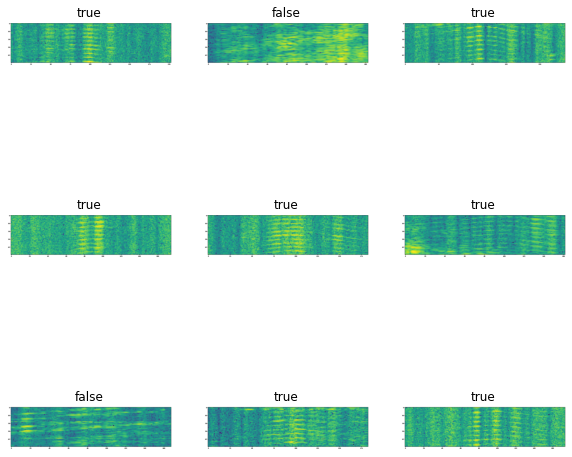

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Train a model using these datasets by passing them to `model.fit` in a moment.

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 405, 1533, 3)
(20,)


## Standardize the data

# Create the model

In [9]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

`optimizers.Adam` optimizer and `losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [10]:
model.compile(  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam'),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

## Model summary

View all the layers of the network using the model's `summary` method:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 405, 1533, 3)      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 405, 1533, 16)     448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 202, 766, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 202, 766, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 101, 383, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 383, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 191, 64)       0

## Train the model

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
280/280 [==============================] - 790s 3s/step - loss: 0.4985 - accuracy: 0.8062 - val_loss: 0.3393 - val_accuracy: 0.8500
Epoch 2/10
280/280 [==============================] - 784s 3s/step - loss: 0.3300 - accuracy: 0.8660 - val_loss: 0.3218 - val_accuracy: 0.8516
Epoch 3/10
280/280 [==============================] - 783s 3s/step - loss: 0.2561 - accuracy: 0.8975 - val_loss: 0.2850 - val_accuracy: 0.8613
Epoch 4/10
280/280 [==============================] - 783s 3s/step - loss: 0.2043 - accuracy: 0.9210 - val_loss: 0.2535 - val_accuracy: 0.9048
Epoch 5/10
280/280 [==============================] - 785s 3s/step - loss: 0.1448 - accuracy: 0.9481 - val_loss: 0.2295 - val_accuracy: 0.9032
Epoch 6/10
280/280 [==============================] - 784s 3s/step - loss: 0.1088 - accuracy: 0.9640 - val_loss: 0.2269 - val_accuracy: 0.9000
Epoch 7/10
280/280 [==============================] - 784s 3s/step - loss: 0.0853 - accuracy: 0.9726 - val_loss: 0.2688 - val_accuracy: 0.8984

## Visualize training results

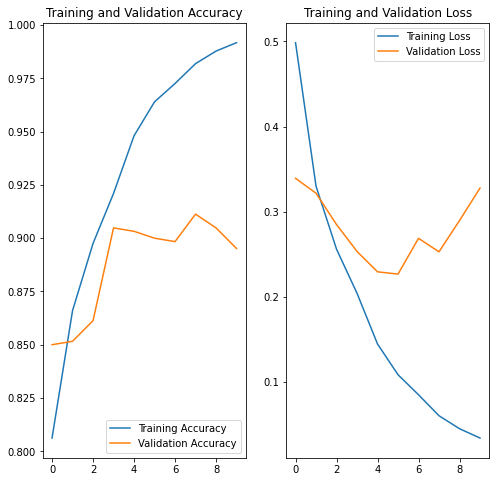

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'F:\check3',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 216 files belonging to 2 classes.


In [15]:
test_loss, test_acc = model.evaluate(test_ds)
print(test_loss, test_acc)

11/11 [==============================] - 7s 584ms/step - loss: 0.0560 - accuracy: 0.9907
0.055967144668102264 0.9907407164573669


In [13]:
predictions = model.predict(test_ds)

In [16]:
test_ds.file_paths[0]

'F:\\check\\false\\1040_2.png'

In [17]:
predictions[0]

array([ 1.0430375, -0.6604527], dtype=float32)

In [18]:
np.argmax(predictions[0])

0

In [15]:
for i in range(53):
    print('File:\t' + str(test_ds.file_paths[i]) + '\tprobably:\t'  + str(np.argmax(predictions[i])))

File:	F:\check\false\975_2.png	probably:	0
File:	F:\check\false\939_4.png	probably:	0
File:	F:\check\true\1038_12.png	probably:	0
File:	F:\check\false\939_1.png	probably:	0
File:	F:\check\false\1023_1.png	probably:	0
File:	F:\check\false\983_2.png	probably:	0
File:	F:\check\false\983_3.png	probably:	0
File:	F:\check\false\1021_3.png	probably:	0
File:	F:\check\false\976_1.png	probably:	0
File:	F:\check\true\1038_11.png	probably:	1
File:	F:\check\false\1004_1.png	probably:	0
File:	F:\check\false\1017_1.png	probably:	0
File:	F:\check\false\1021_2.png	probably:	0
File:	F:\check\false\1046_2.png	probably:	1
File:	F:\check\false\1019_2.png	probably:	0
File:	F:\check\false\1021_4.png	probably:	0
File:	F:\check\false\1040_1.png	probably:	0
File:	F:\check\true\1038_14.png	probably:	0
File:	F:\check\false\1004_2.png	probably:	0
File:	F:\check\false\1017_2.png	probably:	0
File:	F:\check\false\939_5.png	probably:	1
File:	F:\check\false\975_1.png	probably:	0
File:	F:\check\false\976_5.png	probably:

In [17]:
!mkdir -p saved_model